In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from os import system

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

import seaborn as sns

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [4]:
original_df = pd.read_csv("MinNumLosses.csv")
df = pd.read_csv("MinNumLosses.csv")
# print(len(df))
runtime15=df[df['min_num_losses'] == -1].index
df.drop(runtime15, inplace=True)
# test_df = df(np.random.randn(100,2))
train_df, test_df = train_test_split(df, test_size = 0.2)
test_y = test_df['min_num_losses'].values
train_df, validation_df = train_test_split(train_df, test_size=0.2)
# train_df.reset_index(drop=True)
print(len(train_df))

12384


In [5]:
train_df.describe(include='all')
# print((train_df['runtime'].max())%1 == 0)
# print(train_df[(train_df['c_avg_deg_cons'] < 3)])

,c_avg_deg_cons,c_avg_dom_cons,c_avg_domdeg_cons,c_bounds_d,c_bounds_r,c_bounds_z,c_cv_deg_cons,c_cv_dom_cons,c_cv_domdeg_cons,c_domain,...,v_ratio_bounded,v_ratio_vars,v_sum_deg_vars,v_sum_dom_vars,v_sum_domdeg_vars,number_of_teams,fixtures_left,number_of_constraints,runtime,min_num_losses
count,12384.000000,12384.000000,12384.000000,12384.0,12384.0,12384.0,12384.000000,12384.000000,12384.000000,12384.0,...,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000
mean,2.729224,4.854550,1.714919,0.0,0.0,0.0,0.656375,0.735984,0.462546,0.0,...,0.349750,0.978849,1891.830346,1879.792959,816.213988,10.760578,4.281815,2.851340,0.857448,3.273821
std,0.084483,0.589739,0.155663,0.0,0.0,0.0,0.152498,0.104065,0.076710,0.0,...,0.171066,0.007923,1284.534432,1305.327235,557.922062,3.729434,2.902720,1.414822,3.015841,2.334923
min,2.432620,3.653340,1.408750,0.0,0.0,0.0,0.412949,0.511876,0.278296,0.0,...,0.112381,0.950704,341.000000,339.000000,155.000000,6.000000,1.000000,1.000000,0.020000,0.000000
25%,2.676530,4.458760,1.595380,0.0,0.0,0.0,0.522827,0.650470,0.405846,0.0,...,0.184685,0.973483,798.000000,798.000000,340.473000,7.000000,2.000000,2.000000,0.040000,1.000000
50%,2.740825,4.895030,1.716230,0.0,0.0,0.0,0.630688,0.734407,0.457028,0.0,...,0.316071,0.980198,1386.000000,1406.000000,595.305000,10.000000,4.000000,3.000000,0.070000,3.000000
75%,2.797650,5.294810,1.826840,0.0,0.0,0.0,0.797686,0.813263,0.513945,0.0,...,0.512299,0.985573,2903.000000,2839.000000,1264.180000,14.000000,6.000000,4.000000,0.140000,5.000000
max,2.878490,5.961950,2.037180,0.0,0.0,0.0,1.009230,1.028680,0.656425,0.0,...,0.706587,0.991839,6156.000000,6623.000000,2712.450000,18.000000,16.000000,5.000000,15.020000,9.000000


In [6]:
def getAverages(lst, average_feature, average_result):
    copy_lst = lst.reset_index(drop=True)
    averages = []
    if copy_lst[average_feature].max()%1 == 0:
        for value in range(1, copy_lst[average_feature].max()+1):
            value_indices = np.where(copy_lst[average_feature]==value)
            total=0
            for value_index in value_indices[0]:
                total += int(copy_lst[average_result][value_index])
            if len(value_indices[0]) != 0:
                averages.append([value, total/len(value_indices[0])])
    else:
        for value in range(1, (int(copy_lst[average_feature].max()//1)+3)):
            value_indices_less = np.where((copy_lst[average_feature]<=value))
            value_indices_greater = np.where((copy_lst[average_feature]>value-1))
            value_indices = [np.intersect1d(value_indices_less, value_indices_greater)]
            print(np.average(value_indices[0]))
            total=0
            for value_index in value_indices[0]:
                total += copy_lst[average_result][value_index]
            if len(value_indices[0]) != 0:
                averages.append([value, total/len(value_indices[0])])
    return averages

In [7]:
train_y = train_df['min_num_losses'].values
league_numeric_features = [
 'c_avg_deg_cons',
 'c_avg_dom_cons',
 'c_avg_domdeg_cons',
 'c_cv_deg_cons',
 'c_cv_dom_cons',
 'c_cv_domdeg_cons',
 'c_ent_deg_cons',
 'c_ent_dom_cons',
 'c_ent_domdeg_cons',
 'c_logprod_deg_cons',
 'c_logprod_dom_cons',
 'c_max_deg_cons',
 'c_max_dom_cons',
 'c_max_domdeg_cons',
 'c_num_cons',
 'c_ratio_cons',
 'c_sum_ari_cons',
 'c_sum_dom_cons',
 'c_sum_domdeg_cons',
 'd_bool_vars',
 'd_int_cons',
 'd_int_vars',
 'd_ratio_bool_vars',
 'd_ratio_int_cons',
 'd_ratio_int_vars',
 'o_deg',
 'o_deg_avg',
 'o_deg_cons',
 'o_deg_std',
 'o_dom',
 'o_dom_avg',
 'o_dom_std',
 'v_avg_deg_vars',
 'v_avg_dom_vars',
 'v_avg_domdeg_vars',
 'v_cv_deg_vars',
 'v_cv_dom_vars',
 'v_cv_domdeg_vars',
 'v_def_vars',
 'v_ent_deg_vars',
 'v_ent_dom_vars',
 'v_ent_domdeg_vars',
 'v_intro_vars',
 'v_logprod_deg_vars',
 'v_logprod_dom_vars',
 'v_max_deg_vars',
 'v_max_dom_vars',
 'v_max_domdeg_vars',
 'v_min_dom_vars',
 'v_min_domdeg_vars',
 'v_num_aliases',
 'v_num_consts',
 'v_num_vars',
 'v_ratio_bounded',
 'v_ratio_vars',
 'v_sum_deg_vars',
 'v_sum_dom_vars',
 'v_sum_domdeg_vars\n\n',
 'number_of_teams',
 'fixtures_left',
 'number_of_constraints']

null_league_numeric_values = [
    'v_min_deg_vars',
    'c_bounds_d',
    'c_bounds_r',
    'c_bounds_z',
    'd_ratio_set_cons',
    'd_ratio_set_vars',
    'd_set_cons',
    'd_set_vars',
    'gc_diff_globs',
    'gc_global_cons',
    'gc_ratio_diff',
    'gc_ratio_globs',
    's_bool_search',
    's_first_fail',
    's_goal',
    's_indomain_max',
    's_indomain_min',
    's_input_order',
    's_int_search',
    's_labeled_vars',
    's_other_val',
    's_other_var',
    's_set_search',
    'o_dom_deg',
    'd_ratio_float_cons',
    'd_ratio_float_vars',
    'c_min_deg_cons',
    'c_min_dom_cons',
    'c_min_domdeg_cons',
    'd_ratio_array_cons',
    'd_ratio_bool_cons',
    'd_float_cons',
    'd_float_vars',
    'd_array_cons',
    'd_bool_cons',
    'c_domain',
    'c_priority',
]

In [8]:
# # split the features into sets of 5, check their correlation with output, and delete
# # uncorrelated features
# split_features = []
# # league_numeric_features += ['result']
# features_with_y = league_numeric_features
# # train_df['result'] = train_y

# for i in range(0, len(features_with_y), 10):
#     split_features.append(features_with_y[i:i+10]+['min_num_losses'])

# # print(split_features)
# # list(df.columns)
# plt.figure(figsize=(30,30))
# # cor = train_df[split_features[1]].corr()
# cor = train_df[league_numeric_features+['min_num_losses']].corr()
# # print(train_df[split_features[1]].corr())
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

In [9]:
lr = Pipeline([
    ('pre', ColumnTransformer([('num', FunctionTransformer(lambda x : x), league_numeric_features)], remainder="drop")),
    ('est', LinearRegression())
])

In [10]:
# train_df.isnull().sum()
print([i for i in train_df.columns if train_df[i].isnull().any()])
# train_df.isna().any()

['gc_ratio_diff']


In [11]:
lr = Pipeline([
    ('pre', ColumnTransformer([('num', FunctionTransformer(lambda x : x), league_numeric_features)], remainder="drop")),
    ('est', Lasso(alpha=1.0))
])

model = lr.fit(train_df, train_y)
print(model.score(train_df, train_y))

0.3850631081997701


/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12251.06002731396, tolerance: 6.751047278746777
  positive)


In [12]:
np.mean(cross_val_score(lr, test_df, test_y, scoring='neg_mean_squared_error', cv=10))

/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3687.8173970031207, tolerance: 1.9136888888888863
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3752.3109667983163, tolerance: 1.9087866819747408
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3758.49480330378, tolerance: 1.9156379735935727
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

-3.331081572207426

/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3687.8173970031207, tolerance: 1.9136888888888863
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3752.3109667983163, tolerance: 1.9087866819747408
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3758.49480330378, tolerance: 1.9156379735935727
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

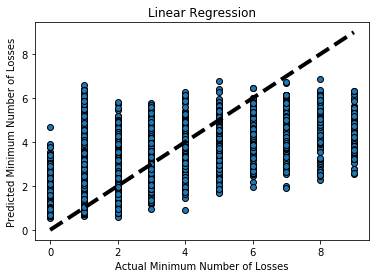

In [21]:
predicted = cross_val_predict(lr, test_df, test_y, cv=10)
fix, ax = plt.subplots()
ax.scatter(test_y, predicted, edgecolors=(0,0,0))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
plt.title("Linear Regression")
ax.set_xlabel('Actual Minimum Number of Losses')
ax.set_ylabel('Predicted Minimum Number of Losses')
plt.show()
# remove 15 second timeouts

In [22]:
predicted = cross_val_predict(lr, test_df, test_y, cv=10)
np.corrcoef(predicted, test_y)

/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3687.8173970031207, tolerance: 1.9136888888888863
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3752.3109667983163, tolerance: 1.9087866819747408
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3758.49480330378, tolerance: 1.9156379735935727
  positive)
/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

array([[1.       , 0.6281303],
       [0.6281303, 1.       ]])

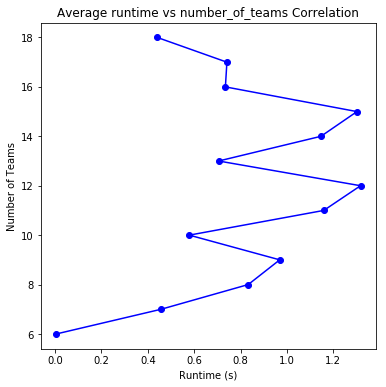

In [15]:
results = getAverages(train_df, 'number_of_teams', 'runtime')
runtime = []
number_of_teams = []
for item in results:
    runtime.append(item[1])
    number_of_teams.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('Average runtime vs number_of_teams Correlation')
plt.plot(runtime, number_of_teams, color='blue', marker='o')
plt.xlabel('Runtime (s)')
plt.ylabel('Number of Teams')
plt.show()

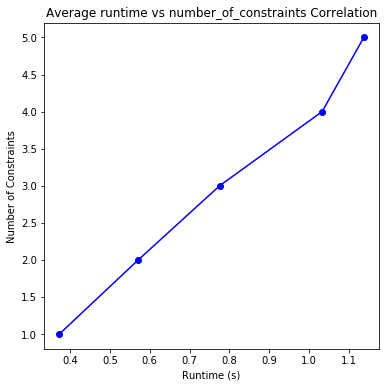

In [16]:
results = getAverages(train_df, 'number_of_constraints', 'runtime')
runtime = []
number_of_teams = []
for item in results:
    runtime.append(item[1])
    number_of_teams.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('Average runtime vs number_of_constraints Correlation')
plt.plot(runtime, number_of_teams, color='blue', marker='o')
plt.xlabel('Runtime (s)')
plt.ylabel('Number of Constraints')
plt.show()

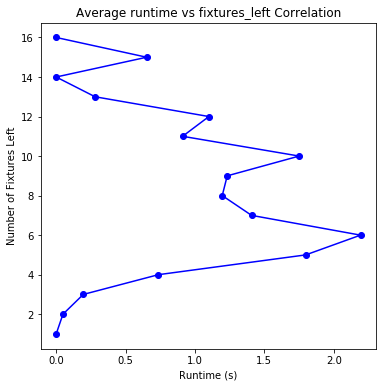

In [17]:
results = getAverages(train_df, 'fixtures_left', 'runtime')
runtime = []
fixtures_left = []
for item in results:
    runtime.append(item[1])
    fixtures_left.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('Average runtime vs fixtures_left Correlation')
plt.plot(runtime, fixtures_left, color='blue', marker='o')
plt.xlabel('Runtime (s)')
plt.ylabel('Number of Fixtures Left')
plt.show()

<h1>Evaluation of Average Case Runtimes</h1>

In [18]:
for i in range(df['number_of_teams'].min(), df['number_of_teams'].max()+1):
    average = df[df['number_of_teams'] == i]['runtime'].mean()
#     print(average)
    print('%s number of teams Average Runtime: %f' % (i, average))
    
# print(df['number_of_teams'].mean())

6 number of teams Average Runtime: 0.042591
7 number of teams Average Runtime: 0.503184
8 number of teams Average Runtime: 0.950747
9 number of teams Average Runtime: 1.030466
10 number of teams Average Runtime: 0.832602
11 number of teams Average Runtime: 1.251167
12 number of teams Average Runtime: 1.345087
13 number of teams Average Runtime: 0.953266
14 number of teams Average Runtime: 1.308412
15 number of teams Average Runtime: 1.469952
16 number of teams Average Runtime: 0.809774
17 number of teams Average Runtime: 0.862943
18 number of teams Average Runtime: 0.836944


In [19]:
for i in range(df['number_of_constraints'].min(), df['number_of_constraints'].max()+1):
    average = df[df['number_of_constraints'] == i]['runtime'].mean()
#     print(average)
    print('%s number of constraints Runtime: %f' % (i, average))

1 number of constraints Runtime: 0.514110
2 number of constraints Runtime: 0.641729
3 number of constraints Runtime: 0.930624
4 number of constraints Runtime: 1.194089
5 number of constraints Runtime: 1.178968


In [20]:
for i in range(df['fixtures_left'].min(), df['fixtures_left'].max()+1):
    average = df[df['fixtures_left'] == i]['runtime'].mean()
#     print(average)
    print('%s fixtures left Runtime: %f' % (i, average))

1 fixtures left Runtime: 0.069149
2 fixtures left Runtime: 0.131558
3 fixtures left Runtime: 0.287933
4 fixtures left Runtime: 0.821362
5 fixtures left Runtime: 1.990373
6 fixtures left Runtime: 2.373885
7 fixtures left Runtime: 1.569706
8 fixtures left Runtime: 1.618589
9 fixtures left Runtime: 1.240700
10 fixtures left Runtime: 1.666633
11 fixtures left Runtime: 1.163125
12 fixtures left Runtime: 1.265090
13 fixtures left Runtime: 0.499591
14 fixtures left Runtime: 0.155161
15 fixtures left Runtime: 1.179000
16 fixtures left Runtime: 0.194444
